In [1]:
#_________________ Applied Statistics 2023/2024 _________________________________

#### 5.1.Exploratory Spatial Data Analysis on Lattice Data with rgeoda ####
#_______________________________________________________________________________#

In [2]:

#### 1. Install and load `rgeoda` ####

#install.packages("rgeoda")

library(rgeoda)

Loading required package: digest



In [3]:
# In addition, the package sf needs to be loaded, since it is a dependency:

library(sf)

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE



In [4]:
#### 2. Load Spatial Data ####

# The rgeoda package for R relies on the sf package for basic spatial data
# handling functions. 
# In a typical R workflow, one first reads a shape file (or other GIS format file) 
# with the data using the sf st_read(file path) command. 
# For example, to load the Shapefile `Guerry.shp` comes with the package:
  
guerry_path <- system.file("extdata", "Guerry.shp", package = "rgeoda")
print(guerry_path)
guerry <- st_read(guerry_path)

# Once the spatial object has been created, 
# it can be used to compute a spatial weights matrix
# using one of the several weights functions in rgeoda.

[1] "/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rgeoda/extdata/Guerry.shp"


Reading layer `Guerry' from data source 
  `/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/rgeoda/extdata/Guerry.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 85 features and 29 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 47680 ymin: 1703258 xmax: 1031401 ymax: 2677441
Projected CRS: NTF (Paris) / Lambert zone II


In [5]:
#### 3. Spatial Weights ####

# Spatial weights are central components in spatial data analysis: 
# they represent the possible spatial interactions between observations in space. 
# rgeoda provides 4 functions to create 3 different types of spatial weights:
  
# - Contiguity Based Weights: `queen_weights()`, `rook_weights()`
# - Distance Based Weights: `distance_weights()`
# - K-Nearest Neighbor Weights: `knn_weights()`

In [6]:
##### 3.1 Queen Contiguity Weights #####

# Contiguity means that two spatial units share a common border of non-zero length. 
# Operationally, we can further distinguish between a rook and a queen criterion of contiguity.
# The queen criterion is somewhat more encompassing and defines neighbors 
# as spatial units sharing a common edge or a common vertex.

# To create a Queen contiguity weights, one can call the function 
# queen_weights(sf_obj, order=1, include_lower_order = False, precision_threshold = 0)

# For example, to create a Queen contiguity weights using the sf object guerry:
  
queen_w <- queen_weights(guerry)
summary(queen_w)

# The function `queen_weights()` returns an instance of  `Weight` object. 

,name,value
,<I<chr>>,<I<chr>>
1,number of observations:,85
2,is symmetric:,TRUE
3,sparsity:,0.0581314878892734
4,# min neighbors:,2
5,# max neighbors:,8
6,# mean neighbors:,4.94117647058824
7,# median neighbors:,5
8,has isolates:,FALSE


In [7]:
#### Attributes of `Weight` object

# To check if weights matrix is symmetric
is_symmetric(queen_w)

# To check if weights matrix has isolates, or if any observation has no neighbors
has_isolates(queen_w)

weights_sparsity(queen_w) # A numeric value of spatial weights sparsity

# To access the details of the weights: e.g. list the neighbors of a specified observation:
nbrs <- get_neighbors(queen_w, idx = 1)
cat("\nNeighbors of the 1-st observation are:", nbrs)

# To compute the spatial lag of a specified observation by passing the values of the selected variable:
lag <- spatial_lag(queen_w, guerry['Crm_prs']) # "Crm_prs" is "Population per Crime against persons"
head(lag)

[1] TRUE

[1] FALSE

[1] 0.05813149


Neighbors of the 1-st observation are: 36 37 67 69

,Spatial.Lag
,<dbl>
1,23047.50
2,26919.67
3,26195.50
4,14401.25
5,15038.67
6,15749.00


In [8]:
##### 3.2 Rook Contiguity Weights #####

# The rook criterion defines neighbors by the existence of a common edge between two spatial units.
# To create a Rook contiguity weights, one can call function: 
#rook_weights(sf_obj, order=1,include_lower_order=False, precision_threshold = 0)

# For example, to create a Rook contiguity weights using the sf object guerry:
  
rook_w <- rook_weights(guerry)
summary(rook_w)

# The weights we created are in memory. To save the weights to a file, one can call the function:
# save_weights(gda_w, id_variable, out_path, layer_name = "")

# The id_variable defines the unique value of each observation when saving a weights file

# The layer_name is the layer name of loaded dataset. 
# For a shapefile, the layer name is the file name without the suffix (e.g. Guerry). 

# For example, using Guerry dataset, the column "CODE_DE" can be used as a key to save a weights file:
  
save_weights(rook_w, guerry['CODE_DE'], out_path = '/Users/alessandragni/Downloads/Guerry_r.gal', 
             layer_name = 'Guerry')

,name,value
,<I<chr>>,<I<chr>>
1,number of observations:,85
2,is symmetric:,TRUE
3,sparsity:,0.0581314878892734
4,# min neighbors:,2
5,# max neighbors:,8
6,# mean neighbors:,4.94117647058824
7,# median neighbors:,5
8,has isolates:,FALSE


[1] FALSE

[1] 96726.14

,name,value
,<I<chr>>,<I<chr>>
1,number of observations:,85
2,is symmetric:,TRUE
3,sparsity:,0.0434602076124567
4,# min neighbors:,1
5,# max neighbors:,7
6,# mean neighbors:,3.69411764705882
7,# median neighbors:,4
8,has isolates:,FALSE


,name,value
,<I<chr>>,<I<chr>>
1,number of observations:,85
2,is symmetric:,FALSE
3,sparsity:,0.0705882352941176
4,# min neighbors:,6
5,# max neighbors:,6
6,# mean neighbors:,6
7,# median neighbors:,6
8,has isolates:,FALSE


[1]  0.0154319783  0.3270633224  0.0212952962  0.0046105448 -0.0028342407
 [6]  0.4149377158 -0.1379463091  0.0998657692  0.2823176310  0.1218745112
[11] -0.0951205417  0.0326111938  0.3878324535  1.1888723840 -0.6452792226
[16] -0.3096492740  0.3662775143  2.0375343539 -0.0050154800  0.0697110572
[21]  2.2720355722  0.2886391551 -0.0070189726 -0.0009906605  0.9517469793
[26]  0.7648322095  0.0432039929 -0.0045362842 -0.0964911860  0.0952360887
[31]  0.0100895206 -0.0109401003 -0.0544245927 -0.0345553975  0.0887531916
[36]  0.0954232056  0.0383617454 -0.1776714441  0.1638208393  1.2309154898
[41]  2.9077203402 -0.0396340261  0.4458735227  0.2491123240  0.0905643622
[46] -0.6212977834 -0.0308773407  0.0375870399  0.2270376112 -0.0918254739
[51] -0.0112400086  0.1085584763 -0.0055113129 -0.0027097589  0.7235016208
[56]  0.0163129939  0.4246564560  0.3787307767 -0.0597158189  0.5050011802
[61]  2.7632125275  0.0656510809  0.1771899330 -0.0572150317  0.4943795537
[66]  0.2870386197 -1.4593300774 -0.0055305930  0.4895990016 -0.0324125662
[71]  2.1366499813  0.9041683235  0.7053678641  1.4098290925  0.0051652159
[76]  0.2238144189 -0.1621373954  0.0195632289 -0.3233724187 -0.0337778226
[81]  0.0118189869 -0.1164679533 -0.5699624657 -0.0859634996  0.2085373916

[1] 0.414 0.123 0.001 0.474 0.452 0.087 0.243 0.326 0.299 0.303 0.237 0.461
[13] 0.248 0.015 0.178 0.166 0.124 0.003 0.456 0.346 0.053 0.145 0.431 0.425
[25] 0.005 0.037 0.464 0.395 0.138 0.316 0.495 0.431 0.359 0.129 0.295 0.058
[37] 0.090 0.231 0.258 0.018 0.026 0.455 0.073 0.057 0.222 0.023 0.369 0.338
[49] 0.282 0.359 0.483 0.252 0.450 0.434 0.138 0.327 0.063 0.005 0.097 0.292
[61] 0.001 0.217 0.237 0.126 0.145 0.344 0.008 0.340 0.079 0.300 0.033 0.142
[73] 0.001 0.001 0.460 0.005 0.212 0.384 0.110 0.409 0.455 0.353 0.006 0.287
[85] 0.128

[1] 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 1 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 2 0 2 2 0 2
[77] 0 0 0 0 0 0 3 0 0

[1] "Not significant" "High-High"       "Low-Low"         "Low-High"       
[5] "High-Low"        "Undefined"       "Isolated"

[1] 0.4187 0.1265 0.0004 0.4679 0.4545 0.0728 0.2312 0.3071 0.3115 0.3088
[11] 0.2187 0.4834 0.2686 0.0102 0.2024 0.1789 0.1320 0.0020 0.4558 0.3519
[21] 0.0479 0.1376 0.4441 0.4195 0.0032 0.0388 0.4733 0.4187 0.1278 0.3300
[31] 0.4939 0.4427 0.3393 0.1419 0.2714 0.0606 0.0724 0.2247 0.2628 0.0185
[41] 0.0214 0.4899 0.0719 0.0589 0.2288 0.0189 0.3759 0.3217 0.2812 0.3735
[51] 0.4695 0.2743 0.4518 0.4286 0.1471 0.3222 0.0647 0.0025 0.0917 0.2812
[61] 0.0001 0.2419 0.2462 0.1266 0.1270 0.3553 0.0094 0.3123 0.0724 0.2975
[71] 0.0307 0.1320 0.0001 0.0002 0.4633 0.0056 0.2162 0.3681 0.1335 0.4069
[81] 0.4536 0.3547 0.0035 0.3096 0.1277

[1] 0.419    NA    NA    NA    NA 0.376    NA 0.442    NA 0.257    NA    NA
[13]    NA 0.082 0.348    NA 0.277 0.010    NA    NA 0.090 0.387    NA    NA
[25]    NA    NA    NA    NA    NA 0.271    NA 0.447    NA    NA    NA    NA
[37]    NA    NA    NA 0.026 0.003    NA    NA    NA    NA    NA    NA    NA
[49]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[61] 0.001    NA 0.465    NA    NA    NA    NA    NA 0.378    NA    NA    NA
[73]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[85]    NA

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[77] 0 0 0 0 0 0 0 0 0

Warning message:
"plotting the first 9 out of 29 attributes; use max.plot = 29 to plot all"


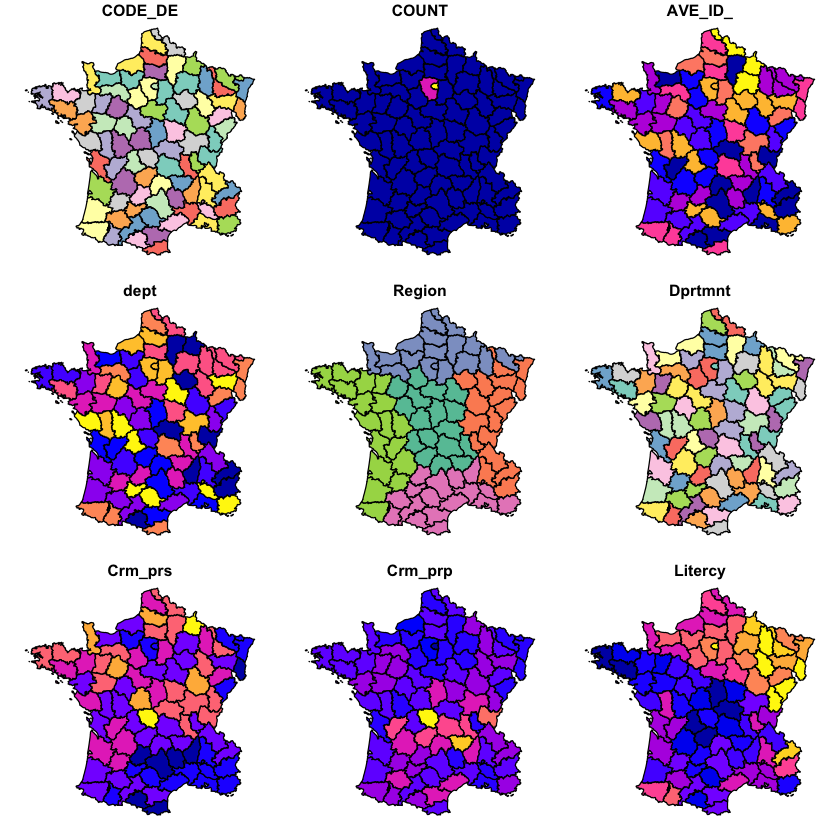

[1] 0 1 1 0 0 2 0 2 0 2 2 0 0 2 0 0 1 0 0 0 0 0 0 2 0 0 0 2 2 0 0 2 1 0 3 0 0 0
[39] 0 0 0 0 0 0 0 2 0 0 3 0 1 0 0 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 1 1 0 0 0 0 0 0
[77] 2 2 0 2 0 0 0 0 0

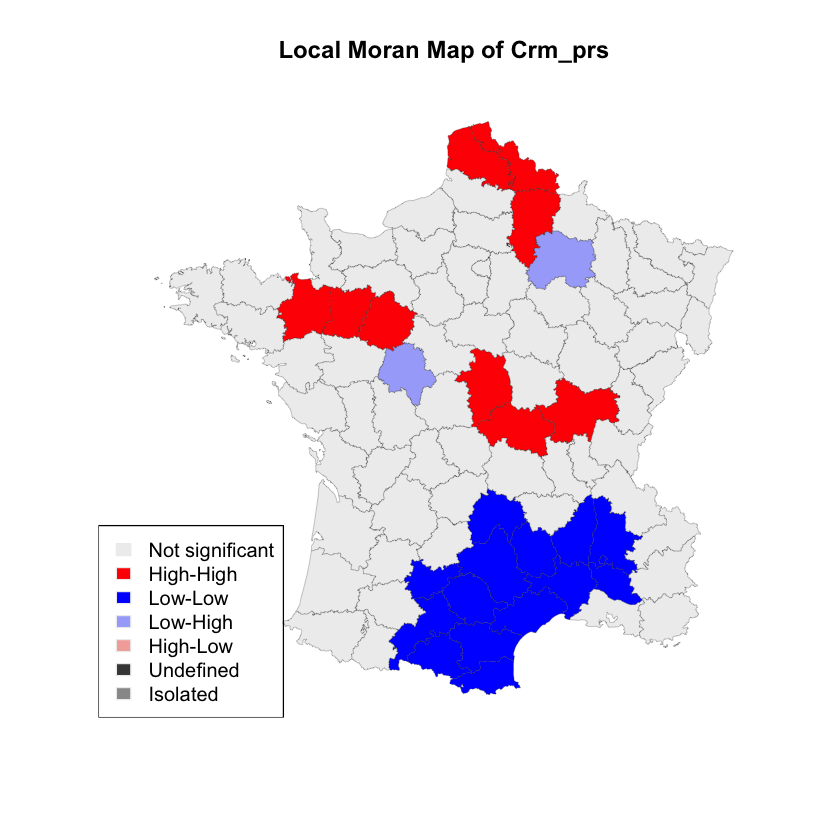

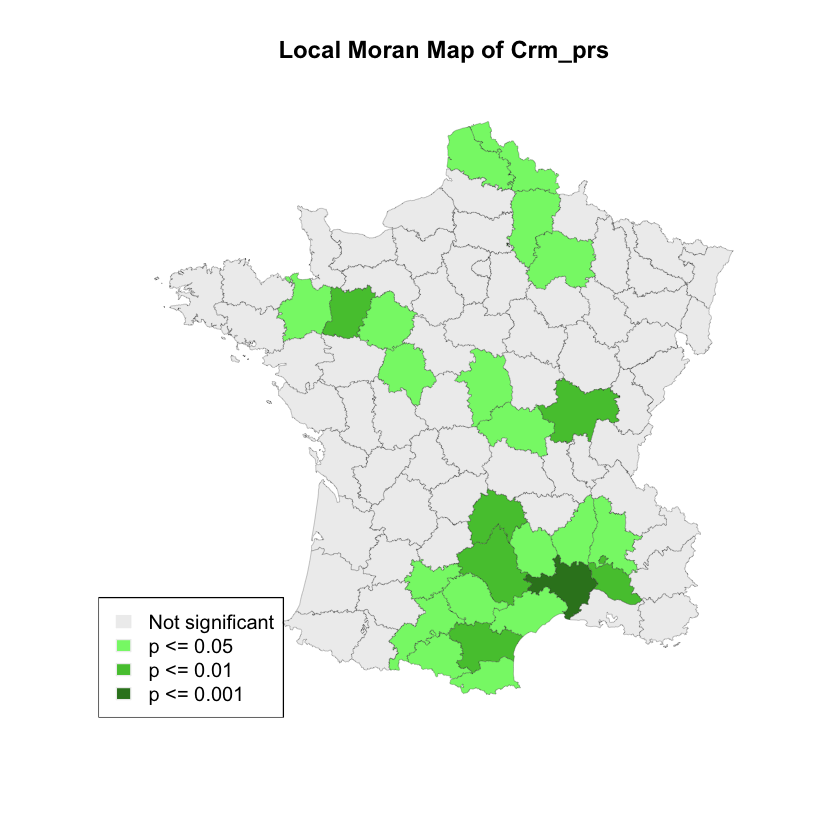

In [9]:
##### 3.3 Distance Based Weights #####

# The most straightforward spatial weights matrix constructed from a distance measure 
# is obtained when i and j are considered neighbors whenever j falls within 
# a critical distance band from i. In order to start the distance based neighbors, 
# we first need to compute a threshold value. 
# rgeoda provides a function min_distthreshold to help you find a optimized 
# distance threshold that guarantees that every observation has at least one neighbor:
# min_distthreshold(GeoDa gda, bool is_arc = False, is_mile = True)

#To create a Distance based weights, one can call the function distance_weights:
# Then, with this distance threshold, we can create a distance-band weights using the function:
#distance_weights(geoda_obj, dist_thres, power=1.0,  is_inverse=False, is_arc=False, is_mile=True)

# For example:   
dist_thres <- min_distthreshold(guerry)
dist_thres
dist_w <- distance_weights(guerry, dist_thres)
summary(dist_w)



##### 3.4 K-Nearest Neighbor Weights #####

# A special case of distance based weights is K-Nearest neighbor weights, 
# in which every observation will have exactly k neighbors. It can be used to avoid 
# the problem of isolate in distance-band weights when a smaller cut-off distance is used. 
# To create a KNN weights, we can call the function `knn_weights`:
# knn_weights(gda, k, power = 1.0,is_inverse = False, is_arc = False, is_mile = True)

# For example, to create a 6-nearest neighbor weights using Guerry:

knn6_w <- knn_weights(guerry, 6)
summary(knn6_w)





#### 4 Local Indicators of Spatial Association–LISA ####

# rgeoda provides following methods for local spatial autocorrelation statistics:
  
# - Local Moran: local_moran()
# - Quantile LISA: local_quantilelisa()



##### 4.1 Local Moran #####

# The Local Moran statistic is a method to identify local clusters and local spatial outliers. 
# For example, we can call  the function `local_moran()` with the created Queen weights 
# and the data "crm_prp = guerry['Crm_prp']" as input parameters:
  
crm_prp = guerry["Crm_prp"]
lisa <- local_moran(queen_w, crm_prp)


# The `local_moran()` function will return a `lisa` object, and we can access its 
# values/results of lisa computation using the following functions:
  
# - lisa_clusters(): Get the local cluster indicators returned from LISA computation.
# - lisa_colors(): Get the cluster colors of LISA computation.
# - lisa_labels(): Get the cluster labels of LISA computation.
# - lisa_values(): Get the local spatial autocorrelation values returned from LISA computation.
# - lisa_num_nbrs(): Get the number of neighbors of every observations in LISA computation.
# - lisa_pvalues(): Get the local pseudo-p values of significance returned from LISA computation.


# For example, we can call the function `lisa_values()` to get the values of the local Moran:

lms <- lisa_values(gda_lisa = lisa)
lms


# To get the pseudo-p values of significance of local Moran computation:
  
pvals <- lisa_pvalues(lisa)
pvals


# To get the cluster indicators of local Moran computation:
  
cats <- lisa_clusters(lisa, cutoff = 0.05)
cats


# The predefined values of the indicators of LISA cluster are:

# 0 Not significant
# 1 High-High
# 2 Low-Low
# 3 High-Low
# 4 Low-High
# 5 Undefined
# 6 Isolated

# which can be accessed via the function lisa_labels():

lbls <- lisa_labels(lisa)
lbls


# By default, the local_moran() function will run with some default parameters, e.g.:
# significance_cutoff: 0.05
# permutation: 999
# permutation_method: 'complete'
# cpu_threads: 6
# seed (for random number generator): 123456789

# which are identical to GeoDa desktop software so to replicate the results in GeoDa software. 
# You can set different values when calling the lisa functions.

# For example, re-run the above local Moran example using 9999 permutations. 
lisa <- local_moran(queen_w, crm_prp, permutations = 9999)

# Then, we can use the same lisa object to get the new results after 9999 permutations:

pvals <- lisa_pvalues(lisa)
pvals


# rgeoda uses GeoDa C++ code, in which multi-threading is used to accelerate the computation of LISA. 
# We can use the argument `ncpu` to specify how many threads to run the computation:
  
lisa <- local_moran(queen_w, crm_prp, cpu_threads = 4)



##### 4.2 Quantile LISA #####

# The quantile local spatial autocorrelation converts the continuous variable 
# to a binary variable that takes the value of 1 for a specific quantile. 
# Then apply a local join count to the data converted. 
# Two input parameters, k and q, need to be specified in the function local_quantilelisa(): 
# k is the number of quantiles (k > 2), and the q is the index of selected quantile lisa ranging from 1 to k.

# For example, 

qsa <- local_quantilelisa(queen_w, crm_prp, 5, 5)

# To get the p-values and cluster indicators of the quantile LISA computation:
lisa_pvalues(qsa)
lisa_clusters(qsa)



#### 6 Exploratory Spatial Data Analysis ####

# For exploratory spatial data analysis, rgeoda provides some utility functions 
# to allow users to easily work with sf to visualize the results and do exploratory spatial data analysis.

##### 6.1 Start from sf package #####

# The sf package has been popular tool to handle geospatial data. 
# It is a good substitute of sp package which will be deprecated soon.

# For example, we can simply call plot() function to render the first 9 choropleth maps 
# using the first 9 variables in the dataset:
  
plot(guerry)


##### 6.2 Exploratory Spatial Data Analysis with rgeoda #####

# Now, with the sf object guerry, you can call rgeoda's spatial analysis functions. 
# For example, to examine the local Moran statistics of variable "crm_prs" 
# (Population per Crime against persons):

queen_w <- queen_weights(guerry)
lisa <- local_moran(queen_w,  guerry['Crm_prs'])


##### 6.3 Create Local Moran Map #####

# With the LISA results, we can make a local Moran cluster map:

lisa_colors <- lisa_colors(lisa)
lisa_labels <- lisa_labels(lisa)
lisa_clusters <- lisa_clusters(lisa)
plot(st_geometry(guerry), 
     col=sapply(lisa_clusters, function(x){return(lisa_colors[[x+1]])}), 
     border = "#333333", lwd=0.2)
title(main = "Local Moran Map of Crm_prs")
legend('bottomleft', legend = lisa_labels, fill = lisa_colors, border = "#eeeeee")

# In the above code, we use th values of cluster indicators from rgeoda's LISA object 
# are used to make the LISA map. We can save the clusters back to the original sf data.frame:

guerry['moran_cluster'] <- lisa_clusters


# Checking the values of the cluster indicators, we will see they are integer numbers 
# 0 (not significant), 1 (high-high cluster), 2 (low-low cluster), 3 (low-high cluster), 
# 4 (high-low cluster), 5 (neighborless/island), 6 (undefined):

lisa_clusters

# To create a significance map that is associated with the local Moran map, 
# we can do the same as making the local Moran cluster map using the results from lisa_pvalues():
  
lisa_p <- lisa_pvalues(lisa)
p_labels <- c("Not significant", "p <= 0.05", "p <= 0.01", "p <= 0.001")
p_colors <- c("#eeeeee", "#84f576", "#53c53c", "#348124")
plot(st_geometry(guerry), 
     col=sapply(lisa_p, function(x){
       if (x <= 0.001) return(p_colors[4])
       else if (x <= 0.01) return(p_colors[3])
       else if (x <= 0.05) return (p_colors[2])
       else return(p_colors[1])
     }), 
     border = "#333333", lwd=0.2)
title(main = "Local Moran Map of Crm_prs")
legend('bottomleft', legend = p_labels, fill = p_colors, border = "#eeeeee")

